# Tugas Data Mining

## Dissimilarity (TUGAS 1)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/car_data.csv"
data = pd.read_csv(url)

In [ ]:
data.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


In [ ]:
# Show dataset shape
number_of_columns = data.shape[1]
# Show all columns for dataset
pd.set_option('display.max_columns', number_of_columns)
pd.set_option('display.max_rows', number_of_columns)

In [ ]:
# Show all columns from dataframe
data.columns

Index(['User ID', 'Gender', 'Age', 'AnnualSalary', 'Purchased'], dtype='object')

### Categorical/Nominal






*   Gender
*   Purchased

In [ ]:
data[["Gender", "Purchased"]].head(5)

,Gender,Purchased
0,Male,0
1,Male,0
2,Male,0
3,Male,1
4,Male,0


### Change Values to 1/0


Take all values of ‘Gender’ series

*   If values is "Male" change to 1
*   If values is "Female" change to 0







In [ ]:
# Gender code
gender_for_male = "Male"
gender_for_female = "Female"

# binary value
value_of_one = 1
value_of_zero = 0

def change_code_gender_to_biner(gender):
    return value_of_one if gender == gender_for_male else value_of_zero

In [ ]:
# update semua data pada kolom Area Type
data["Gender"] = data["Gender"].apply(change_code_gender_to_biner)

In [ ]:
data[["Gender", "Purchased"]].head(5)

,Gender,Purchased
0,1,0
1,1,0
2,1,0
3,1,1
4,1,0


In [ ]:
# Variable yang konstan
DECREMENT_BY_ONE = 1
INCREMENT_BY_ONE = 1

CONTINGENCY_TABLE_VALUE = {
    "q" : (1,1),
    "r" : (1,0),
    "s" : (0,1),
    "t" : (0,0),
}

In [ ]:
def get_series(data, idx, series):
    return data.loc[(idx), series]

In [ ]:
def get_dissimilarity_data(data, series_index = [], series = []):
    first_series = get_series(data, series_index[0], series)
    second_series = get_series(data, series_index[1], series)
    dataa = pd.concat([first_series,second_series],axis=1)
    return dataa.T

In [ ]:
get_dissimilarity_data(data, [1,2], ["Gender", "Purchased"]).T

,1,2
Gender,1,1
Purchased,0,0


In [ ]:
data.loc[0:5, ["Gender", "Purchased"]]

,Gender,Purchased
0,1,0
1,1,0
...,...,...
4,1,0
5,0,1


In [ ]:
def count_contingency_value(data, start_index = 0, last_index = 1):

    CONTINGENCY_VALUE = {
        "q" : 0,
        "r" : 0,
        "s" : 0,
        "t" : 0,
    }

    column_range = data.shape[1]

    for column in range(column_range):
        for value in CONTINGENCY_TABLE_VALUE:
            item = list((tuple(data.loc[(start_index):(last_index), data.columns[column]]) == CONTINGENCY_TABLE_VALUE[value], value))
            if item[0] == True:
                if item[1] == "q":
                    CONTINGENCY_VALUE["q"] += 1
                if item[1] == "r":
                    CONTINGENCY_VALUE["r"] += 1
                if item[1] == "s":
                    CONTINGENCY_VALUE["s"] += 1
                if item[1] == "t":
                    CONTINGENCY_VALUE["t"] += 1

    return CONTINGENCY_VALUE

In [ ]:
# d(1,2)
data_1_2 = get_dissimilarity_data(data, [1,2], ["Gender", "Purchased"])

In [ ]:
c_d_1_2 = count_contingency_value(data_1_2, 1, 2)

In [ ]:
# d(1,3)
data_1_3 = get_dissimilarity_data(data, [1,3], ["Gender", "Purchased"])

In [ ]:
c_d_1_3 = count_contingency_value(data_1_3, 1, 3)

In [ ]:
# d(1,4)
data_1_4 = get_dissimilarity_data(data, [1,4], ["Gender", "Purchased"])

In [ ]:
c_data_1_4 = count_contingency_value(data_1_4, 1, 4)

In [ ]:
# d(1,5)
data_1_5 = get_dissimilarity_data(data, [1,5], ["Gender", "Purchased"])

In [ ]:
c_data_1_5 = count_contingency_value(data_1_5, 1, 5)

### Dissimilarity Binary Assymetric Value Formula


$$ \frac {p + r}{q + r + s} $$


In [ ]:
def measure_dissimilarity_binary_value_assymetric_distance(contingency_value):

    return (contingency_value["r"] + contingency_value["s"]) / (contingency_value["q"] + contingency_value["r"] + contingency_value["s"])

In [ ]:
d_1_2 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_3 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)
d_1_4 = measure_dissimilarity_binary_value_assymetric_distance(c_d_1_2)

In [ ]:
d_1_2

0.0

In [ ]:
d_1_3

0.0

In [ ]:
d_1_4

0.0

## Diskritisasi (TUGAS 2)




1. Carilah data yang bertipe numerik ( data klassifikasi)
2. Lakukan proses diskritisasi dengan *equal width* dan *equal frequency*
3. Lakukan proses diskritisasi dengan basis *entropy*
4. Kumpulkan tugas dengan link github ( web statis dari jupyter book)

### Cari data




sumber
[Data Bunga Iris](https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv)

In [ ]:
import pandas as pd

In [ ]:
# source data
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [ ]:
# Create dataframe
df = pd.read_csv(dataset_url)

In [ ]:
# show first 15 rows
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
...,...,...,...,...,...
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
# CONSTAN SERIES

SEPAL_LENGTH_SERIES = df["sepal.length"]
SEPAL_WIDTH_SERIES = df["sepal.width"]
PETAL_LENGTH_SERIES = df["petal.length"]
PETAL_WIDTH_SERIES = df["petal.width"]

# Class Variety Name 
IRIS_VARIETY = df["variety"]

### Hitung Data


### Definisi *discretization*



1. Proses mengubah data bertipe data *numeric* menjadi data bertipe *categorical*
2. Diskritisasi memiliki 2 pendekatan yaitu *equal-width intervals* dan *equal-frequency intervals*
3. *equal-width intervals* adalah diskritisasi dengan lebar data yang sama
4. *equal-frequency intervals* adalah diskritisasi dengan jumlah data yang sama

##### Cut


* Cut adalah sebuah *method* pada library *pandas* untuk melakukan perhitungan *equal width frequency intervals*


```
# Syntax
pd.cut(series, interval, right=True, label)
```


##### Sepal Width



* Equal Width Intervals lebar kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_width_ew_binning = sepal_width_ew_binning.value_counts()
interval_sepal_width_ew_binning = pd.cut(SEPAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
df_sepal_width_ew = pd.DataFrame(pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ew_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_sepal_width_ew.columns = ["sepal.width", "category", "variety"]

In [ ]:
df_sepal_width_ew

,sepal.width,category,variety
0,3.5,lebar,Setosa
1,3.0,lebar,Setosa
...,...,...,...
148,3.4,lebar,Virginica
149,3.0,lebar,Virginica


In [ ]:
# equal-width intervals binning with label
labelled_sepal_width_ew_binning

lebar            88
sedikit_lebar    47
sangat_lebar     15
Name: sepal.width, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_width_ew_binning

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: sepal.width, dtype: int64

##### Petal Width

* Equal Width Intervals lebar mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True, labels)
labelled_petal_width_ew_binning = petal_width_ew_binning.value_counts()
interval_petal_width_ew_binning = pd.cut(PETAL_WIDTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
df_petal_width = pd.DataFrame(pd.concat((PETAL_WIDTH_SERIES, petal_width_ew_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_petal_width.columns = ["petal.width", "category", "variety"]

In [ ]:
df_petal_width

,petal.width,category,variety
0,0.2,sedikit_lebar,Setosa
1,0.2,sedikit_lebar,Setosa
...,...,...,...
148,2.3,sangat_lebar,Virginica
149,1.8,sangat_lebar,Virginica


In [ ]:
# equal-width intervals with label
labelled_petal_width_ew_binning

lebar            54
sedikit_lebar    50
sangat_lebar     46
Name: petal.width, dtype: int64

In [ ]:
# equal-width intervals without label
interval_petal_width_ew_binning

(0.9, 1.7]       54
(0.0976, 0.9]    50
(1.7, 2.5]       46
Name: petal.width, dtype: int64

##### Sepal Length

* Equal Width Intervals panjang kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_sepal_length_ew_binning = sepal_length_ew_binning.value_counts()
interval_sepal_length_ew_binning = pd.cut(SEPAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
df_sepal_length_ew = pd.DataFrame(pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ew_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_sepal_length_ew.columns = ["sepal_length", "category", "variety"]

In [ ]:
df_sepal_length_ew

,sepal_length,category,variety
0,5.1,sedikit_lebar,Setosa
1,4.9,sedikit_lebar,Setosa
...,...,...,...
148,6.2,lebar,Virginica
149,5.9,lebar,Virginica


In [ ]:
# equal-width intervals with label
labelled_sepal_length_ew_binning

lebar            71
sedikit_lebar    59
sangat_lebar     20
Name: sepal.length, dtype: int64

In [ ]:
# equal-width intervals without label
interval_sepal_length_ew_binning

(5.5, 6.7]      71
(4.296, 5.5]    59
(6.7, 7.9]      20
Name: sepal.length, dtype: int64

##### Petal Length

* Equal Width Intervals panjang mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-width intervals
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True, labels)
labelled_petal_length_ew_binning = petal_length_ew_binning.value_counts()
interval_petal_length_ew_binning = pd.cut(PETAL_LENGTH_SERIES, amount_of_binning, True).value_counts()

In [ ]:
# dataframe of petal-width and petal category
df_petal_length_ew =  pd.DataFrame(pd.concat((PETAL_LENGTH_SERIES,petal_length_ew_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_petal_length_ew.columns = ["petal_length", "category", "variety"]

In [ ]:
df_petal_length_ew

,petal_length,category,variety
0,1.4,sedikit_lebar,Setosa
1,1.4,sedikit_lebar,Setosa
...,...,...,...
148,5.4,sangat_lebar,Virginica
149,5.1,sangat_lebar,Virginica


In [ ]:
# equal-width intervals binning with label
labelled_petal_length_ew_binning

lebar            54
sedikit_lebar    50
sangat_lebar     46
Name: petal.length, dtype: int64

In [ ]:
# equal-width intervals out label
interval_petal_length_ew_binning

(2.967, 4.933]    54
(0.994, 2.967]    50
(4.933, 6.9]      46
Name: petal.length, dtype: int64

##### Qcut
* Qcut adalah sebuah *method* pada library *pandas* untuk melakukan perhitungan *equal frequency intervals*

```
# Syntax
pd.qcut(series, interval, label)
```

##### Sepal Width

* Equal Frequency Intervals lebar kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_sepal_width_ef_binning = sepal_width_ef_binning.value_counts()
interval_sepal_width_ef_binning = pd.qcut(SEPAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-width and sepal category
df_sepal_width_ef = pd.DataFrame(pd.concat((SEPAL_WIDTH_SERIES, sepal_width_ef_binning, IRIS_VARIETY), axis = 1))

In [ ]:
# change columns name
df_sepal_width_ef.columns = ["sepal_width", "category", "variety"]

In [ ]:
df_sepal_width_ef

,sepal_width,category,variety
0,3.5,sangat_lebar,Setosa
1,3.0,lebar,Setosa
...,...,...,...
148,3.4,sangat_lebar,Virginica
149,3.0,lebar,Virginica


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_width_ef_binning

sedikit_lebar    57
lebar            50
sangat_lebar     43
Name: sepal.width, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_width_ef_binning

(1.999, 2.9]    57
(2.9, 3.2]      50
(3.2, 4.4]      43
Name: sepal.width, dtype: int64

##### Petal Width

* Equal Frequency Intervals lebar mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning, labels)
labelled_petal_width_ef_binning = petal_width_ef_binning.value_counts()
interval_petal_width_ef_binning = pd.qcut(PETAL_WIDTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-width and petal category
df_petal_width_ef = pd.DataFrame(pd.concat((PETAL_WIDTH_SERIES, petal_width_ef_binning, IRIS_VARIETY), axis = 1))

In [ ]:
# change columns name
df_petal_width_ef.columns = ["petal_width", "category", "variety"]

In [ ]:
df_petal_width_ef

,petal_width,category,variety
0,0.2,sedikit_lebar,Setosa
1,0.2,sedikit_lebar,Setosa
...,...,...,...
148,2.3,sangat_lebar,Virginica
149,1.8,sangat_lebar,Virginica


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_width_ef_binning

lebar            52
sedikit_lebar    50
sangat_lebar     48
Name: petal.width, dtype: int64

In [ ]:
# equal-frequency intervals without label
interval_petal_width_ef_binning

(0.867, 1.6]      52
(0.099, 0.867]    50
(1.6, 2.5]        48
Name: petal.width, dtype: int64

##### Sepal Length

* Equal Frequency Intervals panjang kelopak bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_sepal_length_ef_binning = sepal_length_ef_binning.value_counts()
interval_sepal_length_ef_binning = pd.qcut(SEPAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of sepal-length and sepal category
df_sepal_length_ef = pd.DataFrame(pd.concat((SEPAL_LENGTH_SERIES, sepal_length_ef_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_sepal_length_ef.columns = ["sepal_length", "category", "variety"]

In [ ]:
df_sepal_length_ef

,sepal_length,category,variety
0,5.1,sedikit_lebar,Setosa
1,4.9,sedikit_lebar,Setosa
...,...,...,...
148,6.2,lebar,Virginica
149,5.9,lebar,Virginica


In [ ]:
# equal-frequency intervals binning with label
labelled_sepal_length_ef_binning

lebar            56
sedikit_lebar    52
sangat_lebar     42
Name: sepal.length, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_sepal_length_ef_binning

(5.4, 6.3]                   56
(4.2989999999999995, 5.4]    52
(6.3, 7.9]                   42
Name: sepal.length, dtype: int64

##### Petal Length

* Equal Frequency Intervals panjang mahkota bunga Iris
* Dikelompokkan menjadi 3 kategori yaitu 
* Kategori sedikit lebar
* Kategori lebar
* Kategori sangat lebar

In [ ]:
# equal-frequency intervals

labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
amount_of_binning = len(labels)

petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning, labels)
labelled_petal_length_ef_binning = petal_length_ef_binning.value_counts()
interval_petal_length_ef_binning = pd.qcut(PETAL_LENGTH_SERIES, amount_of_binning).value_counts()

In [ ]:
# dataframe of petal-length and petal category
df_petal_length_ef = pd.DataFrame(pd.concat((PETAL_LENGTH_SERIES, petal_length_ef_binning, IRIS_VARIETY), axis=1))

In [ ]:
# change columns name
df_petal_length_ef.columns = ["petal_length", "category", "variety"]

In [ ]:
df_petal_length_ef

,petal_length,category,variety
0,1.4,sedikit_lebar,Setosa
1,1.4,sedikit_lebar,Setosa
...,...,...,...
148,5.4,sangat_lebar,Virginica
149,5.1,sangat_lebar,Virginica


In [ ]:
# equal-frequency intervals binning with label
labelled_petal_length_ef_binning

lebar            54
sedikit_lebar    50
sangat_lebar     46
Name: petal.length, dtype: int64

In [ ]:
# equal-frequency intervals out label
interval_petal_length_ef_binning

(2.633, 4.9]      54
(0.999, 2.633]    50
(4.9, 6.9]        46
Name: petal.length, dtype: int64

### Definisi Entropy-based Binning



1.   Metode untuk mengelompokkan data *numeric* menjadi *categorical*
2.   Pengelompokkan dengan mencari jumlah pembagi yang terabaik
3.   Hasil pengelompokkan terbaik adalah dengan *entropy gain* yang paling besar


*  Rumus Entropy

$$
\begin{align*}
\displaystyle Entropy(S) &= \sum_{i=0}^{k} -pi \ log_{2} \ pi \\
\end{align*}
$$



#### Persiapan


*   Impor modul log2 dari *package math*
*   Ambil data yang akan digunakan


```
# dataframe about petal width (Equeal Frequency Interval)
df_petal_width_ef
```

*  Tentukan label


```
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]
```



In [ ]:
# module to calculate log
from math import log2

In [ ]:
# dataframe
target_data = df_petal_width_ef
target_data

,petal_width,category,variety
0,0.2,sedikit_lebar,Setosa
1,0.2,sedikit_lebar,Setosa
...,...,...,...
148,2.3,sangat_lebar,Virginica
149,1.8,sangat_lebar,Virginica


In [ ]:
# category label
labels = ["sedikit_lebar", "lebar", "sangat_lebar"]

##### Functions

###### Fungsi menghitung banyaknya data setiap kategori

In [ ]:
# count every value based the given category
def countEveryCategory(data_column, labels, column, category):
    group = data_column.groupby(category).count()
    amount_of_every_category = []
    for label in labels:
        amount_of_every_category.append(group.loc[label, column])
    return amount_of_every_category

###### Fungsi menghitung banyaknya data setiap kategori berdasarkan nilai pembagi atau *split value* yang diberikan

In [ ]:
# split the given data based on category and split value 
def split(split_value, data_column, labels, col, category):
    less_group = data_column[data_column[col] < split_value]
    greater_group = data_column[data_column[col] >= split_value]
    
    length_less_group = countEveryCategory(less_group, labels, col, category)
    length_greater_group = countEveryCategory(greater_group, labels, col, category)
    
    return (length_less_group, length_greater_group)

###### Fungsi menghitung perbedaan *gain* antara entropi inisial dengan entropi nilai pembagi yang diberikan




---
$$Gain(E_{new}) = (E_{initial}) \ - (E_{new})$$
---



In [ ]:
# count information gain from inisial entropy and new entropy
def count_gain(inisial_entropy, new_entropy):
  return inisial_entropy - new_entropy

###### Fungsi menghitung entropy

In [ ]:
# count entropy
def count_entropy(data_target):
    all_prob = []
    for prob in data_target:
        if (prob/sum(data_target) != 0):
            all_prob.append(prob/sum(data_target) * log2(prob/sum(data_target)))
        else:
            all_prob.append(0)
    return -(sum(all_prob))

###### Fungsi menghitung Info entropy berdasarkan nilai pembagi atau *split value* yang diberikan


---



$$ Info_A(D) = \frac{|D_1|}{|D|} Entropy (D_1)\frac{|D_2|}{|D|}+ Entropy (D_2)$$

In [ ]:
# count entropy for given a split value
def info(d, data_target):
    temp = []
    for value in d:
        temp.append((sum(value) / data_target.shape[0]) * count_entropy(value))
    return sum(temp)

###### Implementasi


*   Hitung target *entropy*
*   Hitung target *entropy* dengan *split value*
*   Hitung *entropy gain* 



In [ ]:
# entropy data target
initial_data_target_entropy = count_entropy(countEveryCategory(target_data, labels, target_data.columns[0], target_data.columns[1]))



*   **Entropy uji coba 1**
*   Nilai *split* yaitu 0.7
*   Data kurang dari $ < 0.7 $
*   Data kurang dari $ >= 0.7 $



In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_1 = info(split(0.7, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)



*   **Entropy uji coba 2**
*   Nilai *split* yaitu $ 1.4 $
*   Data kurang dari $ < 1.4 $
*   Data kurang dari $ >= 1.4 $



In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_2 = info(split(1.4, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)



*   **Entropy uji coba 3**
*   Nilai *split* yaitu $ 2.1 $
*   Data kurang dari $ < 2.1 $
*   Data kurang dari $ >= 2.1 $



In [ ]:
# count Entropy for the target given a split value, split value = 0.7
entropy_data_target_3 = info(split(2.1, target_data, labels, target_data.columns[0], target_data.columns[1]), target_data)

$Gain(E_{new}) = (E_{initial}) \ - (E_{target\ data\ 1})$



In [ ]:
# information gain (entropy data target and entropy_data_target_1)
count_gain(initial_data_target_entropy, entropy_data_target_1)

0.9182958340544896

$Gain(E_{new}) = (E_{initial}) \ - (E_{target\ data\ 2})$

In [ ]:
# information gain (entropy data target and entropy_data_target_2)
count_gain(initial_data_target_entropy, entropy_data_target_2)

0.6536600192724277

$Gain(E_{new}) = (E_{initial}) \ - (E_{target\ data\ 3})$

In [ ]:
# information gain (entropy data target and entropy_data_target_3)
count_gain(initial_data_target_entropy, entropy_data_target_3)

0.2985203537604644

## Implementasi K-NN pada datase iris (TUGAS 3)

In [ ]:
import pandas as pd

In [ ]:
## source data
dataset_url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"

In [ ]:
# Create dataframe
df = pd.read_csv(dataset_url)

In [ ]:
# show first 15 rows
df.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
...,...,...,...,...,...
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
#check number of rows and columns in dataset
df.shape

(150, 5)

In [ ]:
#create a dataframe with all training data except the target column
X = df.drop(columns=["variety"])
#check that the target variable has been removed
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#separate target values
y = df["variety"].values
#view target values
y[0:5]

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array(['Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa'],
      dtype=object)

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.9666666666666667

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
cv_scores mean:0.9666666666666668


In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 6}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9800000000000001

## Naive Bayes Classifier (TUGAS 4)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## source data
dataset_url = "https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/Iris.csv"
data = pd.read_csv(dataset_url)

In [ ]:
data.head(10)

,Id,SepalLengthCm,...,PetalWidthCm,Species
0,1,5.1,...,0.2,Iris-setosa
1,2,4.9,...,0.2,Iris-setosa
...,...,...,...,...,...
8,9,4.4,...,0.2,Iris-setosa
9,10,4.9,...,0.1,Iris-setosa


In [ ]:
data.drop(columns='Id',inplace=True)

In [ ]:
X=data.iloc[:,0:4].values
y=data.iloc[:,4].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_test.shape

(45, 4)

In [ ]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [ ]:
y_train.shape

(105,)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


In [ ]:
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

## K-Means Clustering (Tugas 5)

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/Iris.csv"
colnames = ['sepal-length','sepal-width','petal-length','petal-width','class']
data = pd.read_csv(url)

In [ ]:
data.drop(columns='Id',inplace=True)

In [ ]:
x = data.values[:, 0:4]

In [ ]:
y = data.values[:, 4]

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
label = le.fit_transform(y)

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
dfkelas = pd.DataFrame(label, columns = ['kelas'])

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x_new = pca.fit_transform(x)

In [ ]:
x_new

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [ ]:
from sklearn.cluster import KMeans 

# Number of clusters
kmeans = KMeans =KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(x_new)
#Getting the cluster labels
prediksi = kmeans.predict(x_new)
#Centroid values
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 2.34645113,  0.27235455],
       [-2.64084076,  0.19051995],
       [ 0.66443351, -0.33029221]])

In [ ]:
x_new[:,1:2].shape

(150, 1)

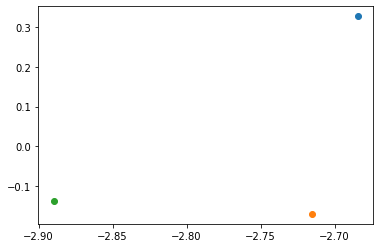

In [ ]:
from numpy import unique
from matplotlib import pyplot
from numpy import where
yhat = unique(prediksi)
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
  # get row indexes for samples with this cluster
  row_ix = where(yhat == cluster) 
  # create scatter of these samples
  pyplot.scatter(x_new[row_ix, 0], x_new[row_ix, 1])
# show the plot
pyplot.show()

In [ ]:
type(x_new[row_ix, 0])

numpy.ndarray

In [ ]:
x_new[row_ix, 0]

array([[-2.88981954]])

In [ ]:
x[row_ix, 1]

array([[3.2]], dtype=object)

In [ ]:
yhat

array([0, 1, 2], dtype=int32)

In [ ]:
prediksi

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [ ]:
a = prediksi
mapping = {1:0, 0:1, 2:2}
a = [mapping[i] for i in a]

In [ ]:
prediksi = np.array(a)
prediksi

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(label, prediksi)

0.44666666666666666

## Decision tree (Tugas 6)

### Pengertian Decision Tree
Decision Tree (Pohon keputusan) adalah jenis pembelajaran mesin terawasi(supervise) yang digunakan untuk mengkategorikan atau membuat prediksi berdasarkan bagaimana serangkaian pertanyaan sebelumnya dijawab. Supervise artinya model dilatih dan diuji pada sekumpulan data yang berisi kategorisasi yang diinginkan.

### Jenis Keputusan
Ada dua jenis utama pohon keputusan berdasarkan variabel sasaran, yaitu pohon keputusan variabel kategorikal dan pohon keputusan variabel kontinu.

Pohon keputusan variabel kategori Sebuah pohon keputusan variabel kategoris termasuk variabel target kategoris dibagi ke dalam kategori. Misalnya, kategori bisa ya atau tidak. Kategori berarti bahwa setiap tahap proses pengambilan keputusan termasuk dalam salah satu kategori ini, dan tidak ada di antaranya.

Pohon keputusan variabel kontinu Pohon keputusan variabel kontinu adalah pohon keputusan dengan variabel target kontinu. Misalnya, pendapatan individu yang pendapatannya tidak diketahui dapat diprediksi berdasarkan informasi yang tersedia seperti pekerjaan, usia, dan variabel kontinu lainnya.



**Rumus Gini Index**
$$ Gini Index = 1-Σ_i^n (P_i)^2 $$

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/Iris.csv'
data = pd.read_csv(url)

In [ ]:
data

,Id,SepalLengthCm,...,PetalWidthCm,Species
0,1,5.1,...,0.2,Iris-setosa
1,2,4.9,...,0.2,Iris-setosa
...,...,...,...,...,...
148,149,6.2,...,2.3,Iris-virginica
149,150,5.9,...,1.8,Iris-virginica


In [ ]:
y = data["Species"]
X = data.drop(columns=["Species"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

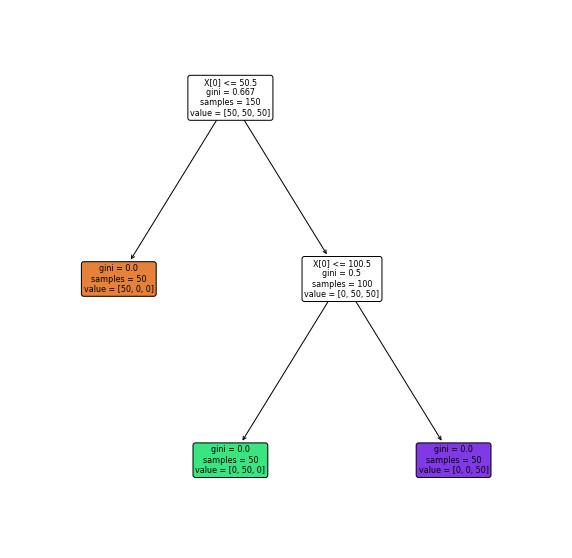

In [ ]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()

## Implementasi Keputusan (TUGAS 7)

### Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
## source data
df = pd.read_csv("https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/credit_score.csv")

df.head()


,Unnamed: 0,kode_kontrak,...,rata_rata_overdue,risk_rating
0,1,AGR-000001,...,61 - 90 days,4
1,2,AGR-000011,...,61 - 90 days,4
2,3,AGR-000030,...,0 - 30 days,1
3,4,AGR-000043,...,46 - 60 days,3
4,5,AGR-000049,...,31 - 45 days,2


In [ ]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [ ]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [ ]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
...,...,...
898,1,0
899,1,0


In [ ]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,...,61 - 90 days,> 90 days
0,AGR-000001,295,...,1,0
1,AGR-000011,271,...,1,0
2,AGR-000030,159,...,0,0
3,AGR-000043,210,...,0,0
4,AGR-000049,165,...,0,0


In [ ]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [ ]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [ ]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,...,> 90 days,risk_rating
0,AGR-000001,295,...,0,4
1,AGR-000011,271,...,0,4
...,...,...,...,...,...
898,AGR-010775,196,...,0,2
899,AGR-010790,204,...,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [ ]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
...,...,...,...
898,0.547826,1.000000,0.000000
899,0.582609,0.333333,0.333333


In [ ]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,...,> 90 days,risk_rating
0,AGR-000001,0,...,0,4
1,AGR-000011,0,...,0,4
...,...,...,...,...,...
898,AGR-010775,1,...,0,2
899,AGR-010790,1,...,0,1


In [ ]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,...,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,...,1.000000,0.833333
1,AGR-000011,0,...,0.666667,0.833333
...,...,...,...,...,...
898,AGR-010775,1,...,1.000000,0.000000
899,AGR-010790,1,...,0.333333,0.333333


In [ ]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,...,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,...,1.000000,0.833333
1,AGR-000011,0,...,0.666667,0.833333
...,...,...,...,...,...
898,AGR-010775,1,...,1.000000,0.000000
899,AGR-010790,1,...,0.333333,0.333333


In [ ]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,...,jumlah_tanggungan,risk_rating
0,AGR-000001,0,...,0.833333,4
1,AGR-000011,0,...,0.833333,4
...,...,...,...,...,...
898,AGR-010775,1,...,0.000000,2
899,AGR-010790,1,...,0.333333,1


### Naive bayes classifier

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [ ]:
X=df_new4.iloc[:,1:10].values
y=df_new4.iloc[:,11].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[69  0  0  0  0]
 [ 0 49  0  0  0]
 [ 0  0 84  0  0]
 [ 0  0  0 36  0]
 [ 0  0  0  0 32]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


### create model for Naive Bayes

In [ ]:
# import pandas
# from sklearn import model_selection
# from sklearn.linear_model import LogisticRegression
# import pickle
# model = GaussianNB()
# model.fit(X_train, y_train)
# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))

# print(result)

### K-NN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

acc_knn = round(neigh.score(X_train, y_train) * 100, 2)
print(acc_knn)

100.0


## Normalization vs Unnomarlization (Tugas 8)


### Proses


*   Baca data *Diabetic Retinopathy Debrecen Data Set*
*   Buat data tes & data latih
*   Cari akurasi dari algoritma berikut 


> Gaussian Naive Bayes


> K - Nearest Neighbors


> Decision Tree


*   Bandingkan akurasi dari setiap algoritma

### Persiapan Lingkungan


*   Impor *library* yang dibutuhkan

In [ ]:
### Data Wrangling 
import pandas as pd
import numpy as np
from scipy.io import arff
from collections import OrderedDict

### Modelling 
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load data set
data = arff.loadarff("/content/drive/MyDrive/datamining/tugas/notebooks-assignement/asset/messidor_features.arff")

In [ ]:
df = pd.DataFrame(data[0])

In [ ]:
#check number of rows and columns in dataset
df.shape

(900, 8)

*    change dataframe's label 

In [ ]:
col_names = []
for i in range(20):
    if i == 0:
        col_names.append("quality")
    if i == 1:
        col_names.append("prescreen")
    if i >= 2 and i <= 7:
        col_names.append("ma" + str(i))
    if i >= 8 and i <= 15:
        col_names.append("exudate" + str(i))
    if i == 16:
        col_names.append("euDist")
    if i == 17:
        col_names.append("diameter")
    if i == 18:
        col_names.append("amfm_class")
    if i == 19:
        col_names.append("label")

In [ ]:
df.columns = col_names

In [ ]:
df

### Create Normalize and Unnormalized data


```
X for data test
y for data label

```

In [ ]:
# percent_amount_of_test_data = / HUNDRED_PERCENT
percent_amount_of_test_data = 0.2

In [ ]:
unnormalized_data = df.drop(columns = ["label"])

In [ ]:
y = df["label"].values

In [ ]:
scaler = MinMaxScaler()
scala = scaler.fit(unnormalized_data)

In [ ]:
normalized_dataset = scaler.transform(unnormalized_data)

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

*    Create an unormalized data set 

In [ ]:
# split unnormalized data
X_train, X_test, y_train, y_test = train_test_split(unnormalized_data, y, test_size = percent_amount_of_test_data, random_state=42, shuffle=False)

*    Create an normalized dataset

In [ ]:
# split normalized data
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(normalized_dataset, y, test_size = percent_amount_of_test_data, random_state=42, shuffle=False)

### Count & Compare Accuracy from Every Model

#### Gaussian Naive bayes


##### Accuracy of Normalization Data

In [ ]:
clf_norm_nb = GaussianNB()
clf_norm_nb.fit(X_train_norm, y_train_norm)

In [ ]:
post_norm_nb = clf_norm_nb.predict_proba(X_test_norm)
probas_norm_nb = post_norm_nb[:,1]
probas_norm_nb = np.round(probas_norm_nb)

In [ ]:
pred_norm_nb = probas_norm_nb
accuracy_norm_nb = accuracy_score(y_test_norm, pred_norm_nb)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_nb} model Gaussian Naive Bayes")

##### Accuracy of Unnormalization Data

In [ ]:
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

In [ ]:
post_nb = clf_nb.predict_proba(X_test)
probas_nb = post_nb[:,1]
probas_nb = np.round(probas_nb)

In [ ]:
pred_nb = probas_nb
accuracy_nb = accuracy_score(y_test, pred_nb)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_nb} model Gaussian Naive Bayes")

#### K - Nearest Neighbors


In [ ]:
# amount of K
k_is_3 = 3
k_is_5 = 5
k_is_7 = 7
k_is_10 = 10

##### Accuracy of Normalization Data

###### K 3

In [ ]:
clf_norm_knn_3 = KNeighborsClassifier(n_neighbors = k_is_3)
clf_norm_knn_3.fit(X_train_norm, y_train_norm)

In [ ]:
post_norm_knn_3 = clf_norm_knn_3.predict_proba(X_test_norm)
probas_norm_knn_3 = post_norm_knn_3[:,1]
probas_norm_knn_3 = np.round(probas_norm_knn_3)

In [ ]:
pred_norm_knn_3 = probas_norm_knn_3
accuracy_norm_knn_3 = accuracy_score(y_test_norm, pred_norm_knn_3)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_knn_3} model KNN-3")

###### K 5

In [ ]:
clf_norm_knn_5 = KNeighborsClassifier(n_neighbors = k_is_5)
clf_norm_knn_5.fit(X_train_norm, y_train_norm)

In [ ]:
post_norm_knn_5 = clf_norm_knn_5.predict_proba(X_test_norm)
probas_norm_knn_5 = post_norm_knn_5[:,1]
probas_norm_knn_5 = np.round(probas_norm_knn_5)

In [ ]:
pred_norm_knn_5 = probas_norm_knn_5
accuracy_norm_knn_5 = accuracy_score(y_test_norm, pred_norm_knn_5)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_knn_5} model KNN-5")

###### K 7

In [ ]:
clf_norm_knn_7 = KNeighborsClassifier(n_neighbors = k_is_7)
clf_norm_knn_7.fit(X_train_norm, y_train_norm)

In [ ]:
post_norm_knn_7 = clf_norm_knn_7.predict_proba(X_test_norm)
probas_norm_knn_7 = post_norm_knn_7[:,1]
probas_norm_knn_7 = np.round(probas_norm_knn_7)

In [ ]:
pred_norm_knn_7 = probas_norm_knn_7
accuracy_norm_knn_7 = accuracy_score(y_test_norm, pred_norm_knn_7)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_knn_7} model KNN-7")

###### K 10

In [ ]:
clf_norm_knn_10 = KNeighborsClassifier(n_neighbors = k_is_10)
clf_norm_knn_10.fit(X_train_norm, y_train_norm)

In [ ]:
post_norm_knn_10 = clf_norm_knn_10.predict_proba(X_test_norm)
probas_norm_knn_10 = post_norm_knn_10[:,1]
probas_norm_knn_10 = np.round(probas_norm_knn_10)

In [ ]:
pred_norm_knn_10 = probas_norm_knn_10
accuracy_norm_knn_10 = accuracy_score(y_test_norm, pred_norm_knn_10)

In [ ]:
print(f"Akurasi dengan data ternormalisasi {accuracy_norm_knn_10} model KNN-10")

##### Accuracy of Unormalization Data

###### K 3

In [ ]:
clf_knn_3 = KNeighborsClassifier(n_neighbors = k_is_3)
clf_knn_3.fit(X_train, y_train)

In [ ]:
post_knn_3 = clf_knn_3.predict_proba(X_test)
probas_knn_3 = post_knn_3[:,1]
probas_knn_3 = np.round(probas_knn_3)

In [ ]:
pred_knn_3 = probas_knn_3
accuracy_knn_3 = accuracy_score(y_test, pred_knn_3)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_knn_3} model KNN-3")

###### K 5

In [ ]:
clf_knn_5 = KNeighborsClassifier(n_neighbors = k_is_5)
clf_knn_5.fit(X_train, y_train)

In [ ]:
post_knn_5 = clf_knn_5.predict_proba(X_test)
probas_knn_5 = post_knn_5[:,1]
probas_knn_5 = np.round(probas_knn_5)

In [ ]:
pred_knn_5 = probas_knn_5
accuracy_knn_5 = accuracy_score(y_test, pred_knn_5)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_knn_5} model KNN-5")

###### K 7

In [ ]:
clf_knn_7 = KNeighborsClassifier(n_neighbors = k_is_7)
clf_knn_7.fit(X_train, y_train)

In [ ]:
post_knn_7 = clf_knn_7.predict_proba(X_test)
probas_knn_7 = post_knn_7[:,1]
probas_knn_7 = np.round(probas_knn_7)

In [ ]:
pred_knn_7 = probas_knn_7
accuracy_knn_7 = accuracy_score(y_test, pred_knn_7)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_knn_7} model KNN-7")

###### K 10

In [ ]:
clf_knn_10 = KNeighborsClassifier(n_neighbors = k_is_10)
clf_knn_10.fit(X_train, y_train)

In [ ]:
post_knn_10 = clf_knn_10.predict_proba(X_test)
probas_knn_10 = post_knn_10[:,1]
probas_knn_10 = np.round(probas_knn_10)

In [ ]:
pred_knn_10 = probas_knn_10
accuracy_knn_10 = accuracy_score(y_test, pred_knn_10)

In [ ]:
print(f"Akurasi dengan data tidak ternormalisasi {accuracy_knn_10} model KNN-10")

##RANDOM FOREST (TUGAS 9)

###Preprocessing Data

In [ ]:
import pandas as pd
import numpy 

In [ ]:

## source data
df = pd.read_csv("https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/credit_score.csv")

df.head()


,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [ ]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [ ]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
895,0,1
896,0,1
897,1,0
898,1,0


In [ ]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,4,0,1,0,0,0,1,0
1,AGR-000011,271,36,5,4,0,1,0,0,0,1,0
2,AGR-000030,159,12,0,1,1,0,1,0,0,0,0
3,AGR-000043,210,12,3,3,0,1,0,0,1,0,0
4,AGR-000049,165,36,0,2,1,0,0,1,0,0,0


In [ ]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [ ]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [ ]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,0,1,0,0,0,1,0,4
1,AGR-000011,271,36,5,0,1,0,0,0,1,0,4
2,AGR-000030,159,12,0,1,0,1,0,0,0,0,1
3,AGR-000043,210,12,3,0,1,0,0,1,0,0,3
4,AGR-000049,165,36,0,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,112,48,5,0,1,0,0,0,0,1,5
896,AGR-010744,120,48,2,0,1,0,0,1,0,0,3
897,AGR-010758,166,24,2,1,0,1,0,0,0,0,1
898,AGR-010775,196,48,0,1,0,0,1,0,0,0,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [ ]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
4,0.413043,0.666667,0.000000
...,...,...,...
895,0.182609,1.000000,0.833333
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000


In [ ]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
4,AGR-000049,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2


In [ ]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,3,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,2,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,2,0.547826,1.000000,0.000000


In [ ]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000


In [ ]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000,3
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333,5
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000,2


In [ ]:
df_new4.shape

(900, 12)

In [ ]:
X=df_new4.iloc[:,1:11].values
y=df_new4.iloc[:,11].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train.shape

(630, 10)

### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  1.0


### create model for Random Forest

In [ ]:
import pandas
from sklearn import model_selection
import pickle
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# apply the whole pipeline to data
dataArray = [0, 1, 1, 0, 1, 0, 0, 0.582609, 0.333333, 0.333333]
pred = loaded_model.predict([dataArray])
print(pred)

[3]


## Ensamble Stacking (TUGAS 10)

### Preprocessing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:

## source data
df = pd.read_csv("https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/credit_score.csv")

df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
df_without_column_for_convert = pd.DataFrame(df, columns = ['kode_kontrak','pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan','risk_rating'])
df_without_column_for_convert.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,295,48,5,4
1,AGR-000011,271,36,5,4
2,AGR-000030,159,12,0,1
3,AGR-000043,210,12,3,3
4,AGR-000049,165,36,0,2


In [ ]:
df_ratarata=pd.get_dummies(df['rata_rata_overdue'])
df_ratarata.head()

,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,0,0,0,1,0
1,0,0,0,1,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [ ]:
df_kpr_aktif=pd.get_dummies(df['kpr_aktif'])
df_kpr_aktif

,TIDAK,YA
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
895,0,1
896,0,1
897,1,0
898,1,0


In [ ]:
df_new = pd.concat([df_without_column_for_convert, df_kpr_aktif,df_ratarata], axis=1)
df_new.head()

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days
0,AGR-000001,295,48,5,4,0,1,0,0,0,1,0
1,AGR-000011,271,36,5,4,0,1,0,0,0,1,0
2,AGR-000030,159,12,0,1,1,0,1,0,0,0,0
3,AGR-000043,210,12,3,3,0,1,0,0,1,0,0
4,AGR-000049,165,36,0,2,1,0,0,1,0,0,0


In [ ]:
df_risk_rating = pd.DataFrame(df, columns = ['risk_rating'])
df_risk_rating.head()

,risk_rating
0,4
1,4
2,1
3,3
4,2


In [ ]:
df_without_risk_rating=df_new.drop(['risk_rating'], axis=1)

In [ ]:
df_new2 = pd.concat([df_without_risk_rating,df_risk_rating], axis=1)
df_new2

,kode_kontrak,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,295,48,5,0,1,0,0,0,1,0,4
1,AGR-000011,271,36,5,0,1,0,0,0,1,0,4
2,AGR-000030,159,12,0,1,0,1,0,0,0,0,1
3,AGR-000043,210,12,3,0,1,0,0,1,0,0,3
4,AGR-000049,165,36,0,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,112,48,5,0,1,0,0,0,0,1,5
896,AGR-010744,120,48,2,0,1,0,0,1,0,0,3
897,AGR-010758,166,24,2,1,0,1,0,0,0,0,1
898,AGR-010775,196,48,0,1,0,0,1,0,0,0,2


In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_for_minmax_scaler=pd.DataFrame(df, columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_for_minmax_scaler.to_numpy()
scaler = MinMaxScaler()
df_hasil_minmax_scaler=scaler.fit_transform(df_for_minmax_scaler)

In [ ]:
df_hasil_minmax_scaler = pd.DataFrame(df_hasil_minmax_scaler,columns = ['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'])
df_hasil_minmax_scaler

,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,0.978261,1.000000,0.833333
1,0.873913,0.666667,0.833333
2,0.386957,0.000000,0.000000
3,0.608696,0.000000,0.500000
4,0.413043,0.666667,0.000000
...,...,...,...
895,0.182609,1.000000,0.833333
896,0.217391,1.000000,0.333333
897,0.417391,0.333333,0.333333
898,0.547826,1.000000,0.000000


In [ ]:
df_drop_column_for_minmaxscaler=df_new2.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan','jumlah_tanggungan'], axis=1)
df_drop_column_for_minmaxscaler

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,4
1,AGR-000011,0,1,0,0,0,1,0,4
2,AGR-000030,1,0,1,0,0,0,0,1
3,AGR-000043,0,1,0,0,1,0,0,3
4,AGR-000049,1,0,0,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5
896,AGR-010744,0,1,0,0,1,0,0,3
897,AGR-010758,1,0,1,0,0,0,0,1
898,AGR-010775,1,0,0,1,0,0,0,2


In [ ]:
df_new3 = pd.concat([df_drop_column_for_minmaxscaler,df_hasil_minmax_scaler], axis=1)
df_new3

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,risk_rating,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,4,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,4,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,1,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,3,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,2,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,5,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,3,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,1,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,2,0.547826,1.000000,0.000000


In [ ]:
df_new3_without_risk_rating=df_new3.drop(['risk_rating'], axis=1)
df_new3_without_risk_rating

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000


In [ ]:
df_new4 = pd.concat([df_new3_without_risk_rating,df_risk_rating], axis=1)
df_new4

,kode_kontrak,TIDAK,YA,0 - 30 days,31 - 45 days,46 - 60 days,61 - 90 days,> 90 days,pendapatan_setahun_juta,durasi_pinjaman_bulan,jumlah_tanggungan,risk_rating
0,AGR-000001,0,1,0,0,0,1,0,0.978261,1.000000,0.833333,4
1,AGR-000011,0,1,0,0,0,1,0,0.873913,0.666667,0.833333,4
2,AGR-000030,1,0,1,0,0,0,0,0.386957,0.000000,0.000000,1
3,AGR-000043,0,1,0,0,1,0,0,0.608696,0.000000,0.500000,3
4,AGR-000049,1,0,0,1,0,0,0,0.413043,0.666667,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...
895,AGR-010739,0,1,0,0,0,0,1,0.182609,1.000000,0.833333,5
896,AGR-010744,0,1,0,0,1,0,0,0.217391,1.000000,0.333333,3
897,AGR-010758,1,0,1,0,0,0,0,0.417391,0.333333,0.333333,1
898,AGR-010775,1,0,0,1,0,0,0,0.547826,1.000000,0.000000,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
import numpy as np

In [ ]:
## source data
df = pd.read_csv("https://raw.githubusercontent.com/RBellaApriliaDamayanti22/Datasets/main/credit_score.csv")

df.head()

,Unnamed: 0,kode_kontrak,pendapatan_setahun_juta,kpr_aktif,durasi_pinjaman_bulan,jumlah_tanggungan,rata_rata_overdue,risk_rating
0,1,AGR-000001,295,YA,48,5,61 - 90 days,4
1,2,AGR-000011,271,YA,36,5,61 - 90 days,4
2,3,AGR-000030,159,TIDAK,12,0,0 - 30 days,1
3,4,AGR-000043,210,YA,12,3,46 - 60 days,3
4,5,AGR-000049,165,TIDAK,36,0,31 - 45 days,2


In [ ]:
### Stacking

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier

In [ ]:
# Create a Randomforest classifier
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)

# Create a XGBoost classifier
boost = XGBClassifier(random_state=123, verbosity=0, use_label_encoder=False)

# Create a Logistic regression classifier

knnclassifier = KNeighborsClassifier(n_neighbors=10)

# Create a stacking classifier

estimators = [
     ('rf', forest),
     ('xgb', boost)
]
sclf = StackingClassifier(estimators=estimators,
                            final_estimator=knnclassifier,
                            cv=10)

# Fit the random forest classifier; Print the scores

forest.fit(X_train, y_train)
print(f"Random forest model training Accuracy: {forest.score(X_train, y_train):0.2f}")
print(f"Random forest model test Accuracy: {forest.score(X_test, y_test):0.2f}")

# Fit the XGBoost classifier; Print the scores

boost.fit(X_train, y_train)
print(f"\nXGBoost model training Accuracy: {boost.score(X_train, y_train):0.2f}")
print(f"XGBoost model test Accuracy: {boost.score(X_test, y_test):0.2f}")

# Fit the Stacking classifier; Print the scores

sclf.fit(X_train, y_train)
print(f"\nStacking classifier training Accuracy: {sclf.score(X_train, y_train):0.2f}")
print(f"Stacking classifier test Accuracy: {sclf.score(X_test, y_test):0.2f}")

Random forest model training Accuracy: 1.00
Random forest model test Accuracy: 1.00

XGBoost model training Accuracy: 1.00
XGBoost model test Accuracy: 1.00

Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 1.00
